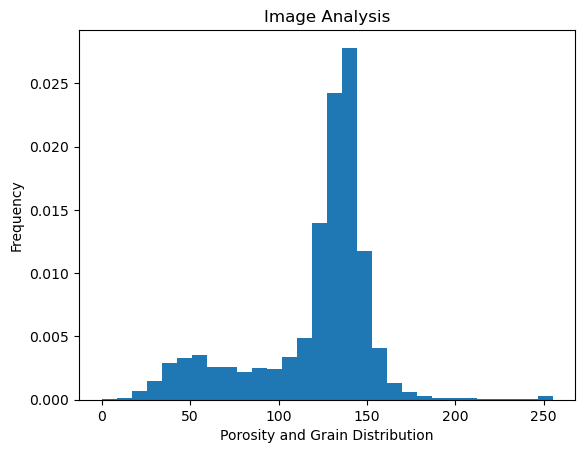

In [22]:
# Image Anaylsis



import numpy as np
from PIL import Image

im = Image.open('berea8bit.tif')
imarray = np.array(im)

# Convert image to a property vector and display as a histogram
imV = imarray.reshape((500*500, 1))

from matplotlib import pyplot as plt
plt.hist(imV, density=True, bins=30, range=[0,255]) 
plt.xlabel('Porosity and Grain Distribution')
plt.ylabel('Frequency')
plt.title('Image Analysis')
plt.show()



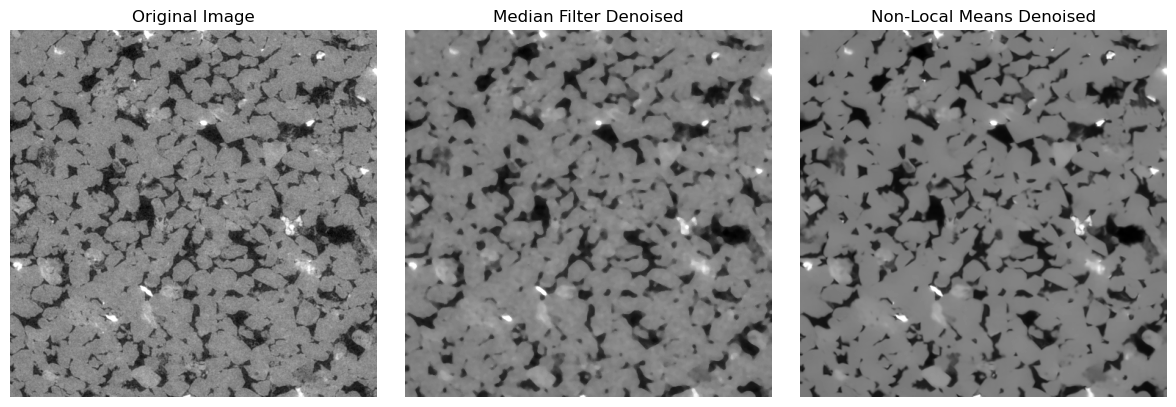

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, restoration, img_as_float
from skimage.morphology import disk
from scipy.ndimage import median_filter


image = io.imread('berea8bit.tif')

image = img_as_float(image)

filter_size = 3  
selem = disk(filter_size)

median_denoised = median_filter(image, footprint=selem)

sigma_est = 0.05 
nlm_denoised = restoration.denoise_nl_means(image, h=1.15 * sigma_est)


io.imsave('median_denoised_image.tif', median_denoised)
io.imsave('nlm_denoised_image.tif', nlm_denoised)


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(median_denoised, cmap='gray')
axes[1].set_title('Median Filter Denoised')
axes[1].axis('off')

axes[2].imshow(nlm_denoised, cmap='gray')
axes[2].set_title('Non-Local Means Denoised')
axes[2].axis('off')

plt.tight_layout()
plt.show()


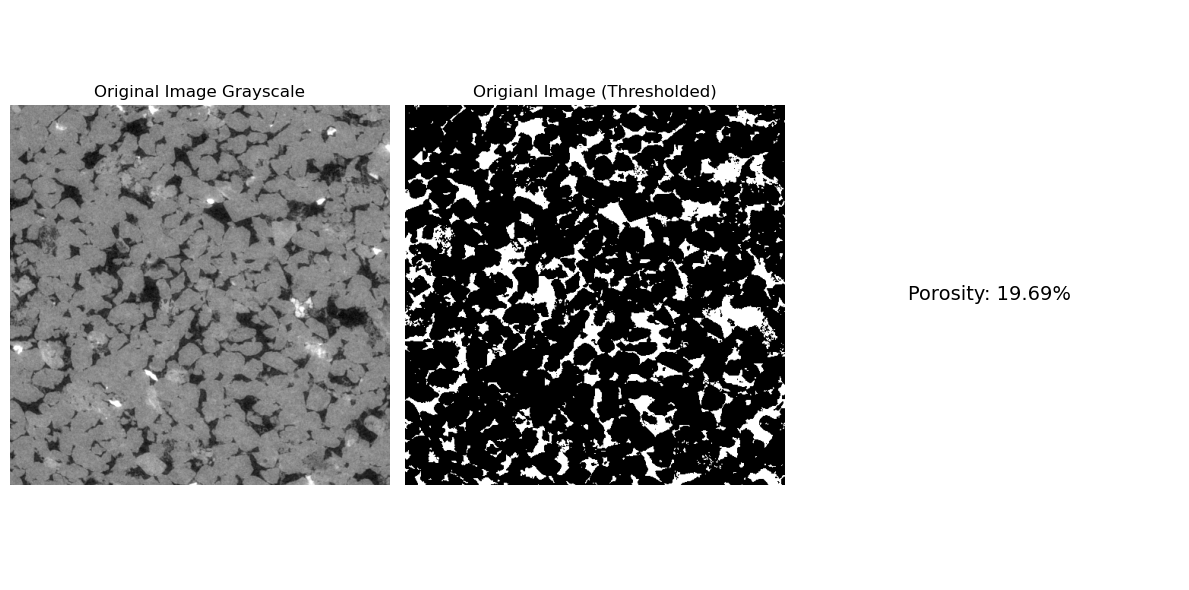

Porosity: 19.69%


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label


image = io.imread('berea8bit.tif')

image = img_as_float(image)

thresh = threshold_otsu(image)
binary_image = image > thresh

total_pixels = np.prod(binary_image.shape)
grain_pixels = np.sum(binary_image)
porosity =1-(grain_pixels / total_pixels)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image Grayscale')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='binary')
plt.title('Origianl Image (Thresholded)')
plt.axis('off')

plt.subplot(133)
plt.text(0.5, 0.5, f'Porosity: {porosity:.2%}', fontsize=14, ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Porosity: {porosity:.2%}')


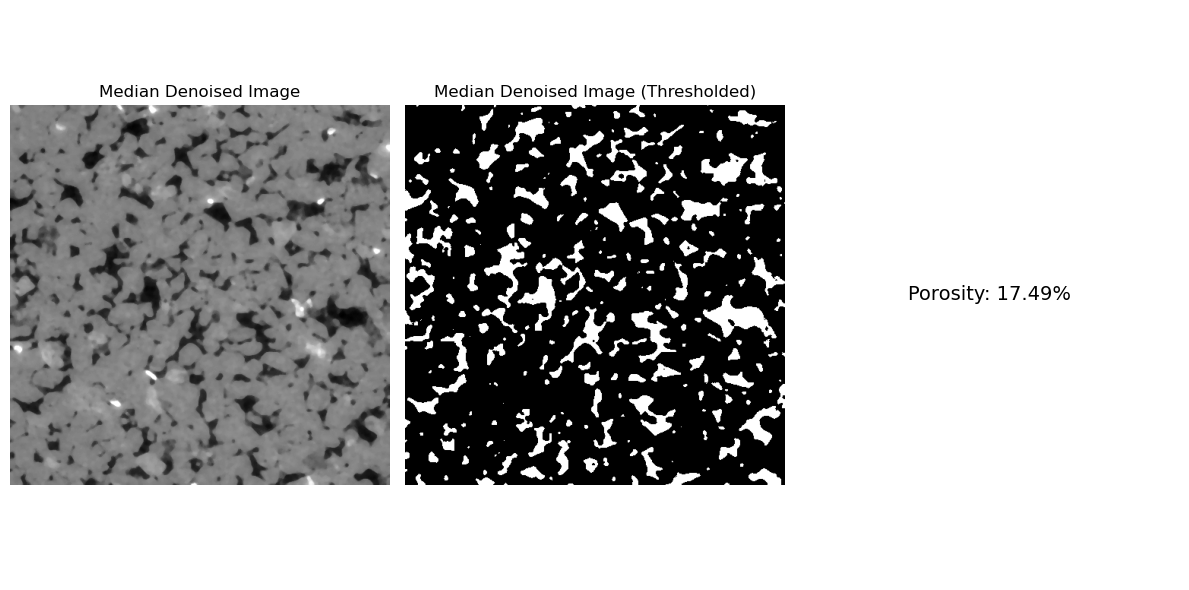

Porosity: 17.49%


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label

image = io.imread('median_denoised_image.tif')

image = img_as_float(image)

thresh = threshold_otsu(image)
binary_image = image > thresh

total_pixels = np.prod(binary_image.shape)
grain_pixels = np.sum(binary_image)
porosity =1-(grain_pixels / total_pixels)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Median Denoised Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='binary')
plt.title('Median Denoised Image (Thresholded)')
plt.axis('off')

plt.subplot(133)
plt.text(0.5, 0.5, f'Porosity: {porosity:.2%}', fontsize=14, ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Porosity: {porosity:.2%}')

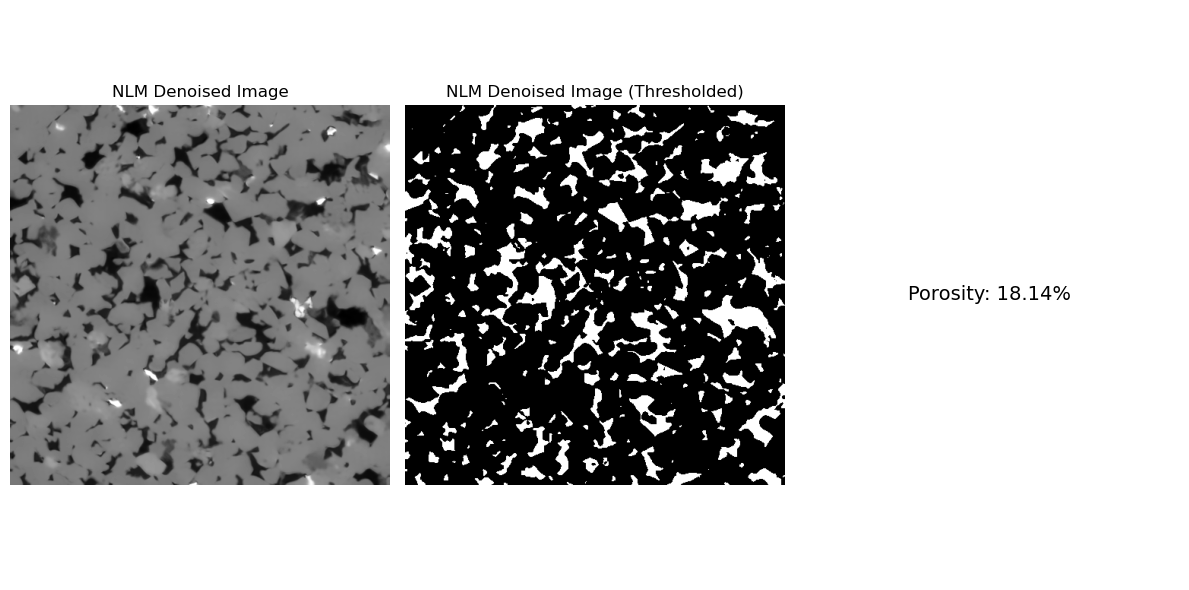

Porosity: 18.14%


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label

image = io.imread('nlm_denoised_image.tif')

image = img_as_float(image)

thresh = threshold_otsu(image)
binary_image = image > thresh

total_pixels = np.prod(binary_image.shape)
grain_pixels = np.sum(binary_image)
porosity =1-(grain_pixels / total_pixels)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('NLM Denoised Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='binary')
plt.title('NLM Denoised Image (Thresholded)')
plt.axis('off')

plt.subplot(133)
plt.text(0.5, 0.5, f'Porosity: {porosity:.2%}', fontsize=14, ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Porosity: {porosity:.2%}')